# Testing explainer 

In [2]:
# intel-tensorflow==2.9.1
# shap @ git+https://github.com/slundberg/shap@v0.41.0
from explainer.explainers import feature_attributions_explainer, metrics_explainer
feature_attributions_explainer.entry_points

EntryPoint(name='deepexplainer', value='feature_attributions_explainer:deep_explainer [labels,targetimages,backgroundimages,model]', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='deeplift', value='feature_attributions_explainer:deeplift [model]', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='gradientexplainer', value='feature_attributions_explainer:gradient_explainer', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='integratedgradients', value='feature_attributions_explainer:integratedgradients [model]', group='explainer.explainers.feature_attributions_explainer')
EntryPoint(name='kernelexplainer', value='feature_attributions_explainer:kernel_explainer [data,model]', group='explainer.explainers.feature_attributions_explainer')


In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

url = 'https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png'
image = Image.open(requests.get(url, stream=True).raw)
feature_extractor = ViTFeatureExtractor.from_pretrained('nateraw/vit-base-patch16-224-cifar10')
model = ViTForImageClassification.from_pretrained('nateraw/vit-base-patch16-224-cifar10')
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
preds = outputs.logits.argmax(dim=1)

classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]
classes[preds[0]]

'dog'

In [1]:
from datasets import list_datasets, load_dataset
from pprint import pprint

datasets_list = list_datasets() 
pprint(datasets_list,compact=True) 

ModuleNotFoundError: No module named 'datasets'

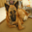

In [3]:
from IPython.display import Image
Image(filename='images/dog10.png')

In [4]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, BasicTokenizer
import torch
import numpy as np
import scipy as sp
import shap


def f(x):
    model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english")
    tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=128, truncation=True) for v in x])
    attention_mask = (tv!=0).type(torch.int64)
    logit_arr = model(tv,attention_mask=attention_mask).logits.detach().cpu().numpy()
    scores = sp.special.expit(logit_arr)
    return scores

def custom_tokenizer(text, return_offsets_mapping=True):
    text = text.lower()
    wordpunct = BasicTokenizer()
    splitted_text_list = wordpunct.tokenize(text)
    pos_list = []
    pos=0
    for item in splitted_text_list: 
      start = text.find(item, pos)
      end = start + len(item)
      pos_list.append((start, end))
      pos = end
    out={}
    out["input_ids"] = splitted_text_list
    if return_offsets_mapping: 
      out['offset_mapping']=pos_list
    return out

masker = shap.maskers.Text(custom_tokenizer)
masker.mask_token = ''
explainer = shap.Explainer(f, masker)

2022-09-30 19:19:37.971044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=1
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=448
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=1
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP

In [ ]:
shap_values = explainer(X[:100])

# plot the SHAP values for the positive class
shap.plots.beeswarm(shap_values[...,1])

In [5]:
#%%script false --no-raise-error

from explainer.explainers import metrics_explainer

pstats = metrics_explainer['pstats']('explainer = shap.Explainer(f, masker)')
pstats.summary

,function calls,time
0,124,0.000


In [6]:
pstats.report

,ncalls,tottime,percall,cumtime,percall,filename:lineno(function)
0,2/1,0.000,0.000,0.000,0.000,_explainer.py:27(__init__)
1,1,0.000,0.000,0.000,0.000,method builtins.exec}
2,18,0.000,0.000,0.000,0.000,_general.py:174(safe_isinstance)
3,19,0.000,0.000,0.000,0.000,method builtins.getattr}
4,1,0.000,0.000,0.000,0.000,_partition.py:27(__init__)
5,42,0.000,0.000,0.000,0.000,method builtins.isinstance}
6,20,0.000,0.000,0.000,0.000,'rsplit' of 'str' objects}
7,1,0.000,0.000,0.000,0.000,<string>:1(<module>)
8,1,0.000,0.000,0.000,0.000,_linear.py:269(supports_model_with_masker)
9,2,0.000,0.000,0.000,0.000,transformers.py:86(is_transformers_lm)


In [7]:
%pinfo explainer

Signature:      
explainer(
    *args,
    max_evals=500,
    fixed_context=None,
    main_effects=False,
    error_bounds=False,
    batch_size='auto',
    outputs=None,
    silent=False,
)
Type:            Partition
String form:     shap.explainers.Partition()
File:            ~/Github/intel-innersource/frameworks.ai.explainable-ai/explainer/explainer/explainers/feature_attributions_explainer/shap/explainers/_partition.py
Docstring:       <no docstring>
Class docstring:
Uses Shapley values to explain any machine learning model or python function.

This is the primary explainer interface for the SHAP library. It takes any combination
of a model and masker and returns a callable subclass object that implements
the particular estimation algorithm that was chosen.
Init docstring: 
Uses the Partition SHAP method to explain the output of any function.

Partition SHAP computes Shapley values recursively through a hierarchy of features, this
hierarchy defines feature coalitions and results i

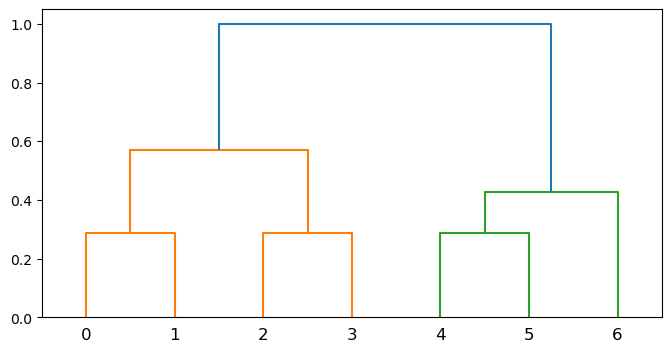

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

sample_text = 'Crossover comfort food with a redemptive twist'
Z=masker.clustering(sample_text)
fig = plt.figure(figsize=(8, 4))
dn = dendrogram(Z)
plt.show()

In [13]:
from transformers import BartForSequenceClassification, BartTokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-mnli')
model = BartForSequenceClassification.from_pretrained('facebook/bart-large-mnli')

# pose sequence as a NLI premise and label (politics) as a hypothesis
premise = 'Counterfactuals'
hypothesis = 'Machine Learning'

# run through model pre-trained on MNLI
input_ids = tokenizer.encode(premise, hypothesis, return_tensors='pt')
logits = model(input_ids)[0]

# we throw away "neutral" (dim 1) and take the probability of
# "entailment" (2) as the probability of the label being true 
entail_contradiction_logits = logits[:,[0,2]]
probs = entail_contradiction_logits.softmax(dim=1)
true_prob = probs[:,1].item() * 100
print(f'Probability that the label is true: {true_prob:0.2f}%')

Probability that the label is true: 41.68%


In [3]:
from transformers import AutoTokenizer, AutoModel
from torch.nn import functional as F
tokenizer = AutoTokenizer.from_pretrained('deepset/sentence_bert')
model = AutoModel.from_pretrained('deepset/sentence_bert')

sentence = 'What explainability methods are most often used with the RoBERTa model?'
labels = ['Counterfactual', 'Contrastive', 'GradCAM', 'ScoreCAM',
          'LayerCAM', 'Smooth gradient', 'Integrated gradient',
          'Partial Dependence Plot', 'Accumulated Local Effects',
          'TCAV'
         ]

# run inputs through model and mean-pool over the sequence
# dimension to get sequence-level representations
inputs = tokenizer.batch_encode_plus([sentence] + labels,
                                     return_tensors='pt',
                                     pad_to_max_length=True)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']
output = model(input_ids, attention_mask=attention_mask)[0]
sentence_rep = output[:1].mean(dim=1)
label_reps = output[1:].mean(dim=1)

# now find the labels with the highest cosine similarities to
# the sentence
similarities = F.cosine_similarity(sentence_rep, label_reps)
closest = similarities.argsort(descending=True)
for ind in closest:
    print(f'label: {labels[ind]} \t similarity: {similarities[ind]}')

Some weights of the model checkpoint at deepset/sentence_bert were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


label: Counterfactual 	 similarity: 0.2732493281364441
label: LayerCAM 	 similarity: 0.2626365125179291
label: Integrated gradient 	 similarity: 0.23581534624099731
label: TCAV 	 similarity: 0.2109149992465973
label: GradCAM 	 similarity: 0.1690794974565506
label: Smooth gradient 	 similarity: 0.1611424684524536
label: Partial Dependence Plot 	 similarity: 0.15151742100715637
label: Contrastive 	 similarity: 0.1331045776605606
label: ScoreCAM 	 similarity: 0.13206973671913147
label: Accumulated Local Effects 	 similarity: 0.09784331917762756


/localdisk/kdkasrav/Github/intel-innersource/frameworks.ai.explainable-ai/explainer/explainer/explainers/feature_attributions_explainer/transformers/tokenization_utils_base.py:2301: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
